# Chebfun in Python

This is a demo following [the original paper of Battles & Trefethen][1].

[1]: http://people.maths.ox.ac.uk/trefethen/publication/PDF/2004_107.pdf

## Initialisation

In principle, it suffices to use the class `Chebfun`, but we'll import all the objects in `chebfun` for convenience.

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg', 'png'}
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pychebfun import *

In [3]:
x = Chebfun.identity()

This is only for this IPython notebook

In [4]:
from IPython.core.display import HTML

We define a convenience plotting function

In [5]:
def cplot(fun):
    plot(fun, with_interpolation_points=True)

## Chebfuns and barycentric interpolation

### Creation of a chebfun

A typical way of initialising a Chebfun is to use the function `chebfun`. It will work for any function.

In [6]:
cube = chebfun(lambda x:x**3)

A more pythonic way to achieve the same result would be using `Chebfun.from_function`, it will also work for any function.

In [7]:
cube = Chebfun.from_function(lambda x:x**3)

Another possibility is to use the variable `x` defined by `x = Chebfun.identity()`:


In [8]:
x = Chebfun.identity()

Note however, that this will only work if the function of x has been registered in chebfun. Here it works because chebfun knows how to compute arbitray powers:

In [9]:
cube = x**3

Other examples could include:

In [10]:
print(np.cos(x))
print(np.tan(x))
print(np.exp(np.sin(x)))

<Chebfun(13)>
<Chebfun(32)>
<Chebfun(20)>


### Display

The _size_ of `f` is the number of interpolation point.

In [11]:
cube.size()

4

Displaying a Chebfun gives the interpolation values at the Chebyshev interpolation points:

In [12]:
print(repr(cube))

Chebfun 
     domain        length     endpoint values
  [ -1.0,   1.0]         4       -1.00    1.00
 vscale = 1.00e+00


In [13]:
Chebfun.from_function(lambda x: x**7 - 3*x + 5).size()

8

In [14]:
f_sin5 = Chebfun.from_function(lambda x: np.sin(5*np.pi*x))
f_sin5.size()

42

### Convergence

For some functions, convergence is not achievable, and one must set a limit to the dichotomy algorithm.

In [15]:
f_abs = Chebfun.from_function(abs, N=1000)

### Evaluations

`Chebfun` objects behave as ordinary function, which can be evaluated at any point.

In [16]:
cube(5)

array(124.99999999999781)

In [17]:
cube(-.5)

array(-0.12500000000000006)

It is also possible (and more efficient) to evaluate a chebfun at several point at once.
For instance, we evaluate the Chebfun for $sin(5x)$ at several points at once:

In [18]:
f_sin5(np.linspace(0, .2, 5))

array([  4.33257766e-16,   7.07106781e-01,   1.00000000e+00,
         7.07106781e-01,  -1.89207484e-15])

### Operations

One can for instance add two chebfuns:

42


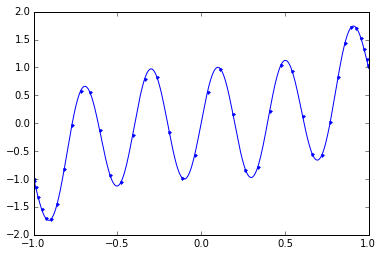

In [19]:
chebsum = cube+f_sin5
print(chebsum.size())
cplot(chebsum)

Or multiply them:

43


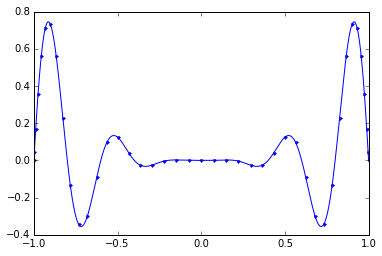

In [20]:
chebmult = cube*f_sin5
print(chebmult.size())
cplot(chebmult)

In [21]:
f_sin = Chebfun.from_function(lambda x:np.sin(x))
print(f_sin.size())
print((f_sin*f_sin).size())

14
17


It is also possible to add and multiply chebfuns with scalars:

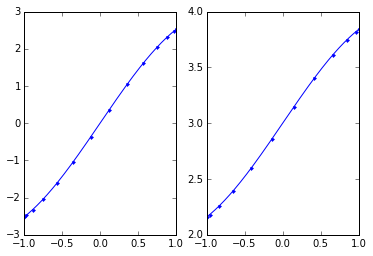

In [22]:
plt.subplot(121)
cplot(3*f_sin)
plt.subplot(122)
cplot(3+f_sin)

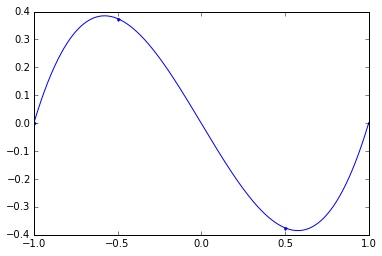

In [23]:
f_cubic = Chebfun.from_function(lambda x: x**3 - x)
cplot(f_cubic)

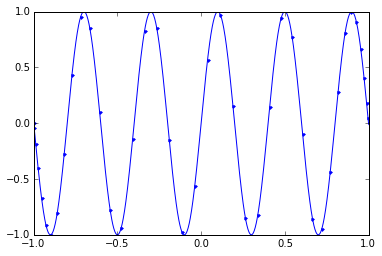

In [24]:
cplot(f_sin5)

### 2D Chebfun

In the paper, they suggest to create two Chebfuns as follows:

In [25]:
np.sin(16*x), np.sin(18*x)

(Chebfun 
      domain        length     endpoint values
   [ -1.0,   1.0]        42        0.29   -0.29
  vscale = 1.00e+00, Chebfun 
      domain        length     endpoint values
   [ -1.0,   1.0]        44        0.75   -0.75
  vscale = 1.00e+00)

It is certainly possible, but we can't create a 2D Chebfun from them, at the moment.
Instead we have to do it like this:

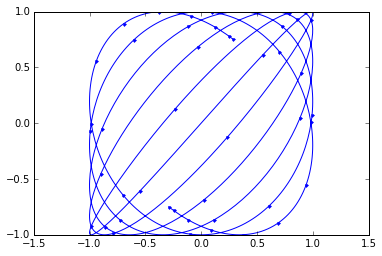

In [26]:
def vector_func(x):
    return np.vstack([np.sin(16*x), np.sin(18*x)]).T
cheb_vec = Chebfun.from_function(vector_func)
cplot(cheb_vec)

## Elementary functions

Again, we explore the two ways to create a chebfun.
First, the general way, which works for any smooth functions:

In [27]:
f_expsin = Chebfun.from_function(lambda x: np.exp(np.sin(x)))

Then, the “operator overloading” way.
We take advantage of the fact that `exp` and `sin` are defined on chebfuns.
Not all functions are, though.
This is very similar to ufuncs in numpy.

In [28]:
g_expsin = np.exp(np.sin(x))

Of course, both chebfuns are equivalent, as we demonstrate here.

In [29]:
print(f_expsin.size())
print(g_expsin.size())

20
20


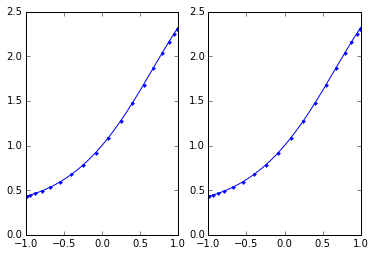

In [30]:
plt.subplot(121)
cplot(f_expsin)
plt.subplot(122)
cplot(g_expsin)

In [31]:
(f_expsin - g_expsin).norm()

0.0

## Approximation Theory

### Gibbs phenomenon

By limiting the accuracy of the chebfun, one observes the celebrated [Gibbs phenomenon](http://en.wikipedia.org/wiki/Gibbs_phenomenon).

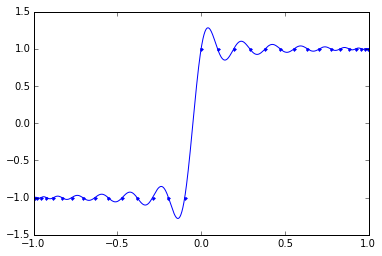

In [32]:
f_sign = Chebfun.from_function(lambda x: np.sign(x), N=25)
cplot(f_sign)

Pychebfun implements the method `compare` which plots a graph of the error.

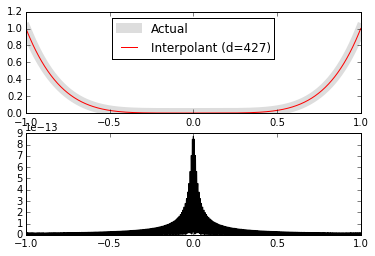

In [33]:
def absfive(x):
    return np.abs(x)**5
#errors = array([(Chebfun(absfive, N) - exact).norm() for N in range(10, 20)])
#loglog(errors)
compare(chebfun(absfive), absfive)

### Interpolation of random data

A chebfun passing through random values at 50 Chebyshev points.
The method to initialise a Chebfun from data _at Chebyshev points_ is `from_data`:

51

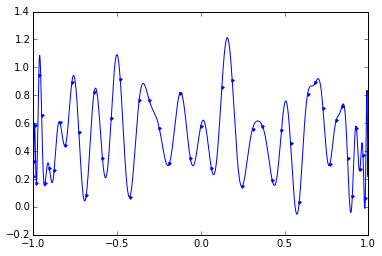

In [34]:
rand_chebfun = Chebfun.from_data(np.random.rand(51))
cplot(rand_chebfun)
rand_chebfun.size()

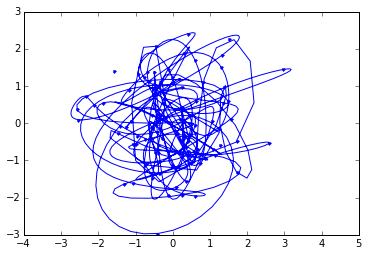

In [35]:
f_walk = Chebfun.from_data(np.random.randn(100,2))
cplot(f_walk)

### Extrapolation

Clearly, as chebfuns are based on polynomial interpolation, there is no guarantee that extrapolation outside the interval $[-1,1]$ will give any sensible result at all.
This is an illustration of that phenomenon.

/Users/olivier/anaconda/envs/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


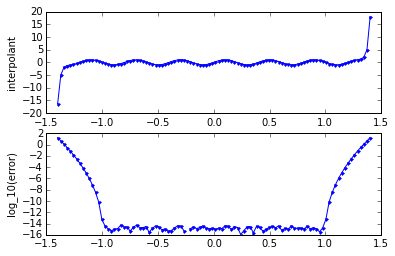

In [36]:
xx = np.linspace(-1.4, 1.4, 100)
error = np.log10(np.abs(f_sin5(xx)-np.sin(5*np.pi*xx)))
plt.subplot(211)
plt.plot(xx, f_sin5(xx), marker='.')
plt.ylabel('interpolant')
plt.subplot(212)
plt.plot(xx,error, marker='.')
plt.ylabel('log_10(error)')

## Chebyshev expansions and FFT

The Chebyshev coefficients of a chebfun are quickly computed using a fast Fourier transform.
The corresponding method is `chebyshev_coefficients`

In [37]:
chebfun(np.exp(x)).coefficients()

array([  1.26606588e+00,   1.13031821e+00,   2.71495340e-01,
         4.43368498e-02,   5.47424044e-03,   5.42926312e-04,
         4.49773230e-05,   3.19843646e-06,   1.99212481e-07,
         1.10367719e-08,   5.50589617e-10,   2.49796764e-11,
         1.03937372e-12,   3.98997075e-14])

In [38]:
Chebfun.from_coeff(np.array([3,2,1.]))

Chebfun 
     domain        length     endpoint values
  [ -1.0,   1.0]         3        2.00    6.00
 vscale = 1.00e+00

One way to create the basis Chebyshev polynomial of order 10.

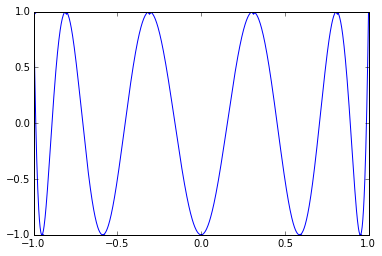

In [39]:
T_10 = Chebfun.from_coeff(np.array([0.]*10+[1]))
cplot(T_10)

Incidentally, the same result is achieved using `Chebfun.basis`:

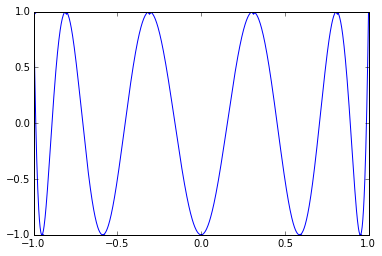

In [40]:
cplot(Chebfun.basis(10))

As an illustration of how fast the fast Fourier transform is, we create a chebfun with 100000 points.

In [41]:
r = np.random.randn(100000)
f_randn = Chebfun.from_coeff(r)

In [42]:
np.sqrt(np.sum(np.square(r)))

315.07559643904472

In [43]:
f_randn.sum()
#f_randn.norm() # doesn't work yet

-2.1299619829224103

In [44]:
T_20 = Chebfun.basis(20)
T_20.norm()

1.4142135623730951

## Integration and Differentiation

### Clenshaw Curtis Quadrature

The method `sum` computes the integral of the chebfun using the Chebyshev expansion and integral of the Chebyshev basis polynomial (it is known as the [Clenshaw–Curtis quadrature](http://en.wikipedia.org/wiki/Clenshaw%E2%80%93Curtis_quadrature))

In [45]:
k_odd = 5
k_even = 2
HTML(r'For odd $k$ we check that $\int T_k = %s$ ($k=%s$), otherwise, $\int T_k = \frac{2}{1-k^2} = %s \approx %s$ for $k = %s$.' % 
(Chebfun.basis(k_odd).sum(), 
 k_odd,
2./(1-k_even**2), 
Chebfun.basis(k_even).sum(), 
k_even))

### Examples

Computing some integrals.

In [46]:
f1 = np.sin(np.pi*x)**2
print(f1.size(), f1.sum())
HTML('$\int \sin(\pi x)^2 dx = %s$' % f1.sum())

25 1.0


In [47]:
f2 = chebfun(lambda x: 1/(5+3*np.cos(np.pi*x)))
print(f2.size(), f2.sum())

51 0.5


In [48]:
f3 = chebfun(lambda x: np.abs(x)**9 * np.log(np.abs(x)+1e-100))
print(f3.size(), f3.sum())

91 -0.02


In [49]:
HTML(r'Computing the norm of $x^2$ gives: %s $\approx \sqrt{\int_{-1}^1 x^4 dx} = \sqrt{\frac{2}{5}} = %s$' % ((x**2).norm(), np.sqrt(2./5)))

The `dot` method computes the Hilbert scalar product, so `f.dot(g)` corresponds to
\\[\int_{-1}^1 f(x) g(x) \mathrm{d} x\\]

In [50]:
x.dot(x)

0.66666666666666674

The `integrate` method computes a primitive $F$ of a chebfun $f$, which is zero at zero i.e.,
\\[F(x) = \int_{0}^x f(y) \mathrm{d}y\\]

In [51]:
f = chebfun(lambda t: 2/np.sqrt(np.pi) * np.exp(-t**2))
erf2_ = f.integrate()
erf2 = erf2_ - erf2_(0)
from scipy.special import erf
randx = np.random.rand()
print(erf2(randx) - erf(randx))

1.83186799063e-15


This allows to define continuous versions of the `prod` and `cumprod` functions for chebfuns:

In [52]:
def prod(f):
    return np.exp(np.log(f).sum())
def cumprod(f):
    return np.exp(np.log(f).integrate())

In [53]:
prod(np.exp(x))

0.99999999999999911

In [54]:
prod(np.exp(np.exp(x)))

10.489789833690226

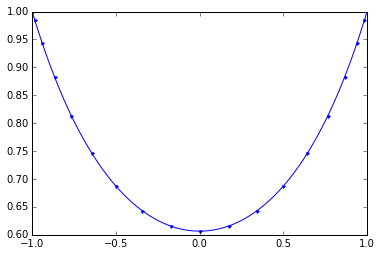

In [55]:
cplot(cumprod(np.exp(x)))

### Differentiation

One can also differentiate chebfuns to arbitrary orders with the method `differentiate`

In [56]:
f_sin5 = np.sin(5*x)
fd_sin5 = f_sin5.differentiate(4)
print(fd_sin5.norm()/f_sin5.norm())

625.000000029


In [57]:
f = np.sin(np.exp(x**2)).differentiate()
print(f(1))

-4.956699465918821


In [58]:
g = Chebfun.from_function(lambda x: 1/(2 + x**2))
h = g.differentiate()
print(h(1))

-0.22222222222880558


In [59]:
#f.differentiate().integrate() == f - f(-1)
#f.integrate().differentiate() == f

## Operations based on rootfinding

As chebfun are polynomial it is possible to find all the roots in the interval $[-1,1]$ using the method `roots`:

In [60]:
print((x - np.cos(x)).roots())

[ 0.73908513]


In [61]:
print((x - np.cos(4*x)).roots())

[ 0.31308831 -0.89882622 -0.53333306]


Zeros of the Bessel function $J_0$ on the interval $[0,20]$:

roots: [ 18.07106397  14.93091771   2.40482556  11.79153444   8.65372791
   5.52007811]


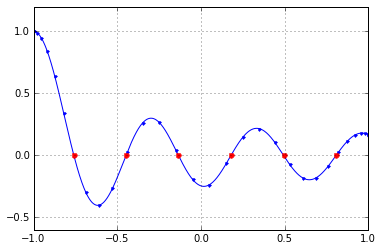

In [62]:
import scipy.special
def J_0(x):
    return scipy.special.jn(0,x)
f = chebfun(lambda x: J_0(10*(1+x)))
cplot(f)
froots = f.roots()
roots = 10*(1+froots)
print('roots:', roots)
plt.plot(froots, np.zeros_like(froots), color='red', marker='.', linestyle='', markersize=10)
plt.grid()

### Extrema

The methods `min` and `max` are not implemented but it is not difficult to do so, by finding the roots of the derivative.
This may come in a future version of `pychebfun`.

In [63]:
f = x - x**2
#print('min', f.min())
#print('max', f.max())
#print('argmax', f.argmax())
#print('norm inf', f.norm('inf'))
#print('norm 1', f.norm(1))

Total variation

In [64]:
def total_variation(f):
    return f.differentiate().norm(1)
#total_variation(x)
#total_variation(sin(5*pi*x))

Here is an example of computation of extrema of a function.

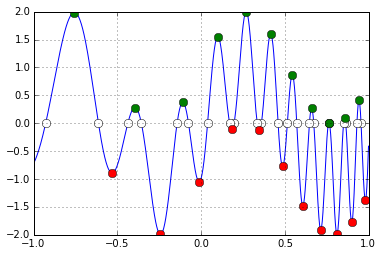

In [65]:
f = np.sin(6*x) + np.sin(30*np.exp(x))
r = f.roots()
fd = f.differentiate()
fdd = fd.differentiate()
e = fd.roots()
ma = e[fdd(e) <= 0]
mi = e[fdd(e) > 0]
def plot_all():
    plot(f, with_interpolation_points=False)
    plt.plot(r, np.zeros_like(r), linestyle='', marker='o', color='white', markersize=8)
    plt.plot(ma, f(ma), linestyle='', marker='o', color='green', markersize=8)
    plt.plot(mi, f(mi), linestyle='', marker='o', color='red', markersize=8)
    plt.grid()
plot_all()

## Applications in numerical analysis

### Quadrature

We apply quadrature to the function
$$ f(x) = \tan(x+\frac{1}{4}) + \cos(10x^2 + \exp(\exp(x)))$$

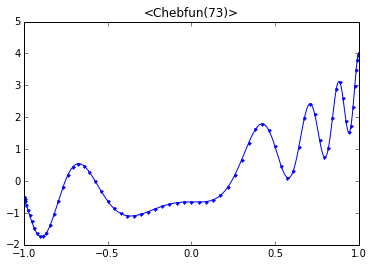

In [66]:
def s(x):
    return np.tan(x+1./4) + np.cos(10*x**2 + np.exp(np.exp(x)))
tancos = chebfun(s)
cplot(tancos)
plt.title(str(tancos))

Using the built-in `quad` quadrature integrator of `scipy.integrate`:

In [67]:
import scipy.integrate
scipy.integrate.quad(s, -1, 1, epsabs=1e-14)[0]

0.2954776762437714

Using Chebyshev integration, we obtain exactly the same value:

In [68]:
tancos.sum()

0.2954776762437713

### ODE Solving

One solves the ODE
$$u'(x) = \mathrm{e}^{-2.75 x u}$$
$$u(-1)=0$$

The problem is rewritten first as an integral problem, namely
$$u(x) = T(u)$$
with
$$T(u) := \int_{-1}^{x} \mathrm{e}^{-2.75 yu(y)} dy$$
This suggest using the following Picard iteration:

Converged in 32 steps
u(1) = 5.07818302386296


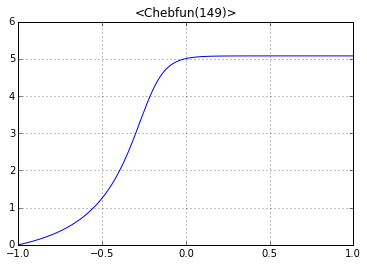

In [69]:
uold = Chebfun(0.)
du = 1.
for i in range(100):
    integrand = np.exp(-2.75*x*uold)
    uint = integrand.integrate()
    u = uint - uint(-1)
    du = u-uold
    uold = u
    if du.norm() < 1e-13:
        break
else:
    print('no convergence')
print('Converged in {} steps'.format(i))
print('u(1) = {:.14f}'.format(float(u(1))))
plot(u)
plt.grid()
plt.title(str(u))

### Boundary value problems

One solves the boundary problem 
$$u''(x) = \mathrm{e}^{4x}$$
with boundary conditions
\\[u(-1) = 0 \qquad u(1) = 0 \\]

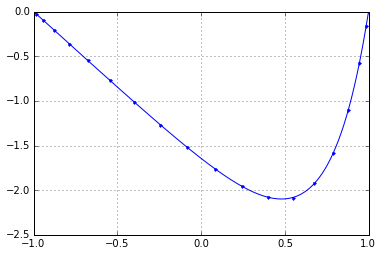

In [70]:
f = np.exp(4*x)
u_ = f.integrate().integrate()
u = u_ - (u_(1)*(x+1) + u_(-1)*(1-x))/2.
cplot(u)
plt.grid()